In [1]:
import ROOT as RT

Welcome to ROOTaaS 6.06/08


In [2]:
RT.gROOT.LoadMacro("IsolationCorrection.C+g")

0

In [3]:
!ls *.root

corrections_hybrid.root  corrections.root  corrections_slope.root


In [4]:
isoCorr = RT.IsolationCorrection("corrections_hybrid.root")

In [5]:
#RT.getIsoCorrection("corrections.root")

In [6]:
isoCorr.histograms_.size()

252L

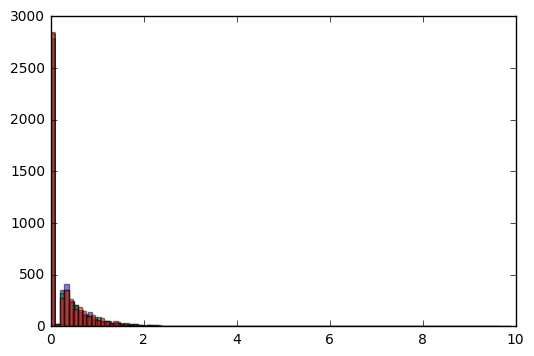

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,10.,1), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,20.,1), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,50.,1), xrange(5000))),100,alpha=0.5);


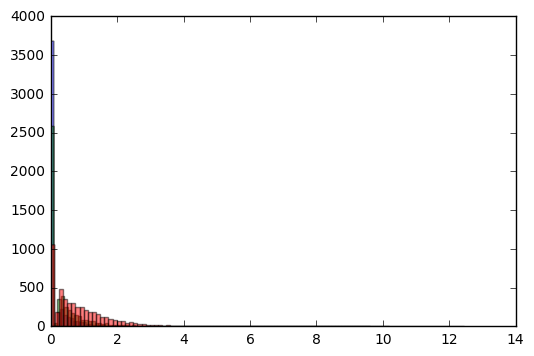

In [8]:
plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,10.), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,20.), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(1.,50.), xrange(5000))),100,alpha=0.5);


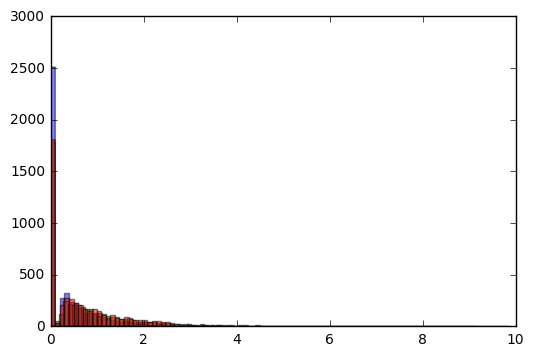

In [9]:
plt.hist(np.array(map(lambda x: isoCorr.getExtra(2.,10.,1), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(2.,20.,1), xrange(5000))),100,alpha=0.5);
plt.hist(np.array(map(lambda x: isoCorr.getExtra(2.,50.,1), xrange(5000))),100,alpha=0.5);


In [14]:

etas = np.linspace(0.,2.5,11)
rhos = np.linspace(0.,20,5)

def gen_grid():
    for eta in etas:
        for rho in rhos:
            yield [eta,rho]

grid = np.array( list(gen_grid()))

distribs = map(lambda y: np.array(map(lambda x: isoCorr.getExtra(*y), xrange(5000))), grid)

profile = np.array( map(lambda x: np.array([x[0][0],x[0][1],x[1].mean(),x[1].std()]), zip(grid,distribs)  ) )

#for dist in distribs: plt.hist(dist,100,alpha=0.5);

#fig.axes[0].set_yscale('log')

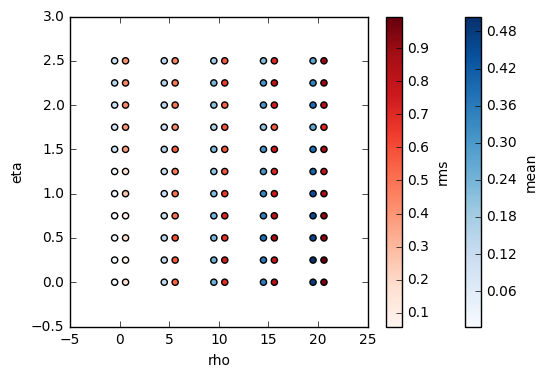

In [19]:
from matplotlib import cm

fig = plt.figure()

plt.scatter(profile[:,1]-0.5,profile[:,0],c=profile[:,2],cmap=cm.Blues)
plt.colorbar().set_label('mean')

fig.axes[0].set_xlabel('rho')
fig.axes[0].set_ylabel('eta')

plt.scatter(profile[:,1]+.6,profile[:,0],c=profile[:,3],cmap=cm.Reds)
plt.colorbar().set_label('rms')
